<a href="https://colab.research.google.com/github/eD07/ChallengeDataScienceTelecomXParte2/blob/main/TelecomXParte2.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


## 📥 Importación de Librerías

Antes de comenzar el análisis, importamos todas las librerías necesarias:

- **requests** → Para realizar solicitudes HTTP y obtener datos desde APIs o recursos externos.
- **pandas (pd)** → Manipulación y análisis de datos en estructuras tipo DataFrame.
- **json** → Lectura y escritura de datos en formato JSON.
- **numpy (np)** → Operaciones matemáticas y manejo eficiente de arreglos.
- **matplotlib.pyplot (plt)** → Creación de gráficos básicos y personalizados.
- **seaborn (sns)** → Visualizaciones estadísticas más atractivas y fáciles de interpretar.
- **MinMaxScaler (sklearn.preprocessing)** → Normalización de variables numéricas al rango `[0, 1]` para igualar la escala entre características.
- **variance_inflation_factor (statsmodels.stats.outliers_influence)** → Cálculo del Factor de Inflación de Varianza (VIF) para detectar multicolinealidad entre variables independientes.
- **add_constant (statsmodels.tools.tools)** → Añadir una constante (intercepto) al conjunto de variables independientes para modelos estadísticos.

Estas librerías nos permitirán **cargar, procesar, visualizar y preparar** nuestros datos para el modelado predictivo, además de **evaluar la multicolinealidad** en el conjunto de variables.

In [1]:
# 📚 Importar librerías necesarias
import requests
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm, colors
from sklearn.preprocessing import MinMaxScaler

# Librerías adicionales para análisis estadístico
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant



## 📂 Extracción de datos | 📄 Lectura del archivo CSV

El primer paso del análisis es cargar el conjunto de datos en nuestro entorno de trabajo.  
En este caso, el archivo fuente se encuentra en formato **CSV** (*Comma Separated Values*), uno de los formatos más comunes para el intercambio y almacenamiento de datos tabulares.

---

### 1️⃣ ¿Por qué CSV?
- 📦 **Es un formato ligero y universal**, compatible con prácticamente cualquier software de análisis.
- ✏️ **Su estructura en texto plano** facilita la lectura y escritura por parte de programas y personas.
- 🐍 **Puede ser manipulado fácilmente** con librerías como *pandas* en Python.


In [2]:
## Leyendo el archivo CSV

# URL RAW del archivo CSV en GitHub
url = "https://raw.githubusercontent.com/eD07/ChallengeDataScienceTelecomXParte2/main/datos_tratados.csv"

# Lee el archivo CSV
df = pd.read_csv(url)

# Muestra las primeras filas
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,Total.Day,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,2.20,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,2.01,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,2.34,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,3.17,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,2.97,83.9,267.40


## 🛠️ Preparación de los Datos: Eliminación de Columnas Irrelevantes

En la etapa de preprocesamiento, uno de los pasos iniciales es **eliminar aquellas columnas que no aportan valor** al análisis o a los modelos predictivos.

---

### 1️⃣ ¿Por qué eliminarlas?
- Identificadores únicos (por ejemplo: `customerID`, `nro_contrato`) no contienen información útil para predecir la variable objetivo.  
- Estos campos suelen ser ruido para el modelo, ya que no tienen relación directa con el comportamiento que queremos predecir.  
- En algunos casos, incluso pueden perjudicar el desempeño del modelo, especialmente en algoritmos sensibles a la dimensionalidad o a relaciones espurias.  

---

### 2️⃣ Beneficios de la eliminación
📉 **Reduce la complejidad de los datos**, facilitando el análisis.  
⚡ **Mejora la velocidad de entrenamiento** del modelo.  
🛡️ **Disminuye el riesgo de overfitting** al evitar que el modelo aprenda patrones aleatorios de columnas sin valor.  

---

💡 **Ejemplo práctico**:  
En un análisis de cancelación de clientes (*Churn*), variables como `customerID` solo identifican registros, pero no ayudan a predecir la probabilidad de cancelación.  

---

✅ **Conclusión**:  
Eliminar columnas irrelevantes es un paso simple pero crucial para obtener modelos más **precisos, interpretables y eficientes**.


In [3]:
df = df.drop(columns=['customerID'])
df.columns

Index(['Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod', 'Total.Day',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')

📂 Creación de una Copia Limpia del DataFrame

Antes de realizar transformaciones o limpieza de datos, es recomendable **trabajar sobre una copia** del DataFrame original.  
Esto permite conservar los datos sin modificaciones y facilita volver al estado inicial si es necesario.  
Con esta práctica evitamos alterar la información original y mantenemos un flujo de trabajo más seguro y ordenado.

In [4]:
df_limpio = df.copy()

📦 Agrupación de Datos en una Nueva Variable

En el preprocesamiento, es común **agrupar o seleccionar ciertas columnas** que requieren un tratamiento especial.  
En este caso, seleccionamos columnas relacionadas con servicios de internet para estandarizar sus valores.


In [5]:
cols_to_fix = ['internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies']



In [6]:
for col in cols_to_fix:
    df_limpio[col] = df_limpio[col].replace('No internet service', 'No')

🗂️ Creación de la Variable `Columnas_Categorias`

En el preprocesamiento, es común **agrupar las columnas según su tipo de dato** para aplicarles un tratamiento específico.  
En este caso, creamos la variable `Columnas_Categorias`, que contiene **todas las columnas de tipo objeto**.  
Este paso facilita la posterior codificación de variables categóricas antes de entrenar los modelos.

In [7]:
columnas_categoricas = df_limpio.select_dtypes(include=['object']).columns
print(columnas_categoricas)

Index(['Churn', 'customer.gender', 'customer.Partner', 'customer.Dependents',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod'],
      dtype='object')


In [8]:
df_encoded = pd.get_dummies(df_limpio, columns=columnas_categoricas, drop_first=True)
df_encoded.head()


,customer.SeniorCitizen,customer.tenure,Total.Day,account.Charges.Monthly,account.Charges.Total,Churn_Yes,customer.gender_Male,customer.Partner_Yes,customer.Dependents_Yes,phone.PhoneService_Yes,...,internet.DeviceProtection_Yes,internet.TechSupport_Yes,internet.StreamingTV_Yes,internet.StreamingMovies_Yes,account.Contract_One year,account.Contract_Two year,account.PaperlessBilling_Yes,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,0,9,2.20,65.6,593.30,False,False,True,True,True,...,False,True,True,False,True,False,True,False,False,True
1,0,9,2.01,59.9,542.40,False,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
2,0,4,2.34,73.9,280.85,True,True,False,False,True,...,True,False,False,False,False,False,True,False,True,False
3,1,13,3.17,98.0,1237.85,True,True,True,False,True,...,True,False,True,True,False,False,True,False,True,False
4,1,3,2.97,83.9,267.40,True,False,True,False,True,...,False,True,True,False,False,False,True,False,False,True


In [9]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   customer.SeniorCitizen                         7043 non-null   int64  
 1   customer.tenure                                7043 non-null   int64  
 2   Total.Day                                      7032 non-null   float64
 3   account.Charges.Monthly                        7043 non-null   float64
 4   account.Charges.Total                          7032 non-null   float64
 5   Churn_Yes                                      7043 non-null   bool   
 6   customer.gender_Male                           7043 non-null   bool   
 7   customer.Partner_Yes                           7043 non-null   bool   
 8   customer.Dependents_Yes                        7043 non-null   bool   
 9   phone.PhoneService_Yes                         7043 

🔍 Verificación de Valores Nulos

En esta etapa del preprocesamiento, revisamos si el conjunto de datos contiene **valores nulos o faltantes**.  
Este paso es fundamental para:

- **Detectar datos incompletos** que puedan afectar el entrenamiento de los modelos.  
- **Definir estrategias de tratamiento**, como imputación o eliminación de registros/columnas.  


In [10]:
df_encoded.isnull().sum()

,0
customer.SeniorCitizen,0
customer.tenure,0
Total.Day,11
account.Charges.Monthly,0
account.Charges.Total,11
Churn_Yes,0
customer.gender_Male,0
customer.Partner_Yes,0
customer.Dependents_Yes,0
phone.PhoneService_Yes,0


🔍 Comprobación de Datos Nulos Antes de Eliminación

Antes de proceder a eliminar registros o columnas, es importante **verificar la presencia de valores nulos** en el conjunto de datos.  

In [11]:
print (df_encoded[['Total.Day','account.Charges.Total']].isnull().sum())

Total.Day                11
account.Charges.Total    11
dtype: int64


🗑️ Eliminación de Datos Nulos Confirmados

Una vez identificadas las columnas o filas con **valores nulos**, procedemos a su eliminación para asegurar que el conjunto de datos esté completo y listo para el modelado.

Este paso permite:  
- Evitar errores durante el entrenamiento de los modelos.  
- Garantizar que no haya sesgos o distorsiones por información incompleta.  
- Mantener la **calidad e integridad** del dataset final.

In [12]:
df_encoded =df_encoded.dropna(subset=['Total.Day','account.Charges.Total'])

🔍 Chequeo de Datos Nulos

Antes de realizar cualquier limpieza, verificamos si existen **valores nulos** en el dataset.  
Este paso es importante para:

- Detectar problemas de calidad de datos.  
- Decidir si se imputan o eliminan estos valores.  
- Evitar errores en etapas posteriores del análisis o modelado.  

In [13]:
df_encoded.isnull().sum()

,0
customer.SeniorCitizen,0
customer.tenure,0
Total.Day,0
account.Charges.Monthly,0
account.Charges.Total,0
Churn_Yes,0
customer.gender_Male,0
customer.Partner_Yes,0
customer.Dependents_Yes,0
phone.PhoneService_Yes,0


## 🔄 Normalización de los datos

La **normalización** o **estandarización** de datos es una etapa clave en el preprocesamiento, especialmente según el tipo de modelo que se vaya a aplicar.

---

### 1. ¿Por qué es necesaria la normalización?
Algunos modelos, como **KNN**, **SVM**, **Regresión Logística** y **Redes Neuronales**, calculan distancias o pesos en función de los valores numéricos.  
Si las variables tienen escalas muy diferentes (por ejemplo, una medida en dólares y otra en porcentajes), las de mayor magnitud pueden dominar el cálculo y sesgar el modelo.

En cambio, los modelos basados en árboles (**Decision Tree**, **Random Forest**, **XGBoost**) **no son sensibles a la escala** y pueden trabajar sin normalización.

---

### 2. Técnica utilizada: Min-Max Scaling
En este caso aplicaremos la **normalización Min-Max**, que transforma todos los valores al rango **[0, 1]**:

\[
X_{norm} = \frac{X - X_{min}}{X_{max} - X_{min}}
\]

**Ventajas de Min-Max:**
- Mantiene la forma original de la distribución de datos.
- Asegura que todas las variables numéricas tengan la misma escala.
- Facilita que cada variable contribuya de forma equilibrada al modelo.

---

### 3. Beneficio para el análisis
- Evita que una variable domine sobre otras por tener mayor rango de valores.
- Mejora el rendimiento y estabilidad de modelos sensibles a la escala.
- Ayuda a que los algoritmos converjan más rápido en el entrenamiento.

💡 **Nota:** Aunque en este caso usamos Min-Max, en contextos con valores atípicos muy extremos podría ser más apropiada una **estandarización Z-score** (media 0, desviación estándar 1).



In [14]:
# Seleccionando solo columnas numéricas (excepto la variable target, si ya está separada)
colunas_numericas = df_encoded.select_dtypes(include=['int64', 'float64']).columns

# Inicializando el scaler
scaler = MinMaxScaler()

# Aplicando la normalización
df_encoded[colunas_numericas] = scaler.fit_transform(df_encoded[colunas_numericas])

# Mostrando los datos normalizados
df_encoded.head()

,customer.SeniorCitizen,customer.tenure,Total.Day,account.Charges.Monthly,account.Charges.Total,Churn_Yes,customer.gender_Male,customer.Partner_Yes,customer.Dependents_Yes,phone.PhoneService_Yes,...,internet.DeviceProtection_Yes,internet.TechSupport_Yes,internet.StreamingTV_Yes,internet.StreamingMovies_Yes,account.Contract_One year,account.Contract_Two year,account.PaperlessBilling_Yes,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,0.0,0.112676,0.484680,0.471144,0.066294,False,False,True,True,True,...,False,True,True,False,True,False,True,False,False,True
1,0.0,0.112676,0.431755,0.414428,0.060420,False,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
2,0.0,0.042254,0.523677,0.553731,0.030239,True,True,False,False,True,...,True,False,False,False,False,False,True,False,True,False
3,1.0,0.169014,0.754875,0.793532,0.140670,True,True,True,False,True,...,True,False,True,True,False,False,True,False,True,False
4,1.0,0.028169,0.699164,0.653234,0.028687,True,False,True,False,True,...,False,True,True,False,False,False,True,False,False,True


## ➕ Correlación entre las Variables

En esta etapa analizamos las **relaciones entre las variables** para identificar cuáles están más asociadas con la variable objetivo.  
Esto permite:

- Detectar relaciones fuertes (positivas o negativas) que puedan ser útiles para el modelo.  
- Reducir el número de variables, eliminando aquellas con baja relevancia.  
- Facilitar la interpretación mediante visualizaciones más claras, como el *heatmap*.  

> Este análisis es clave para seleccionar características relevantes y optimizar el rendimiento del modelo.

In [15]:
corr = df_encoded.corr()

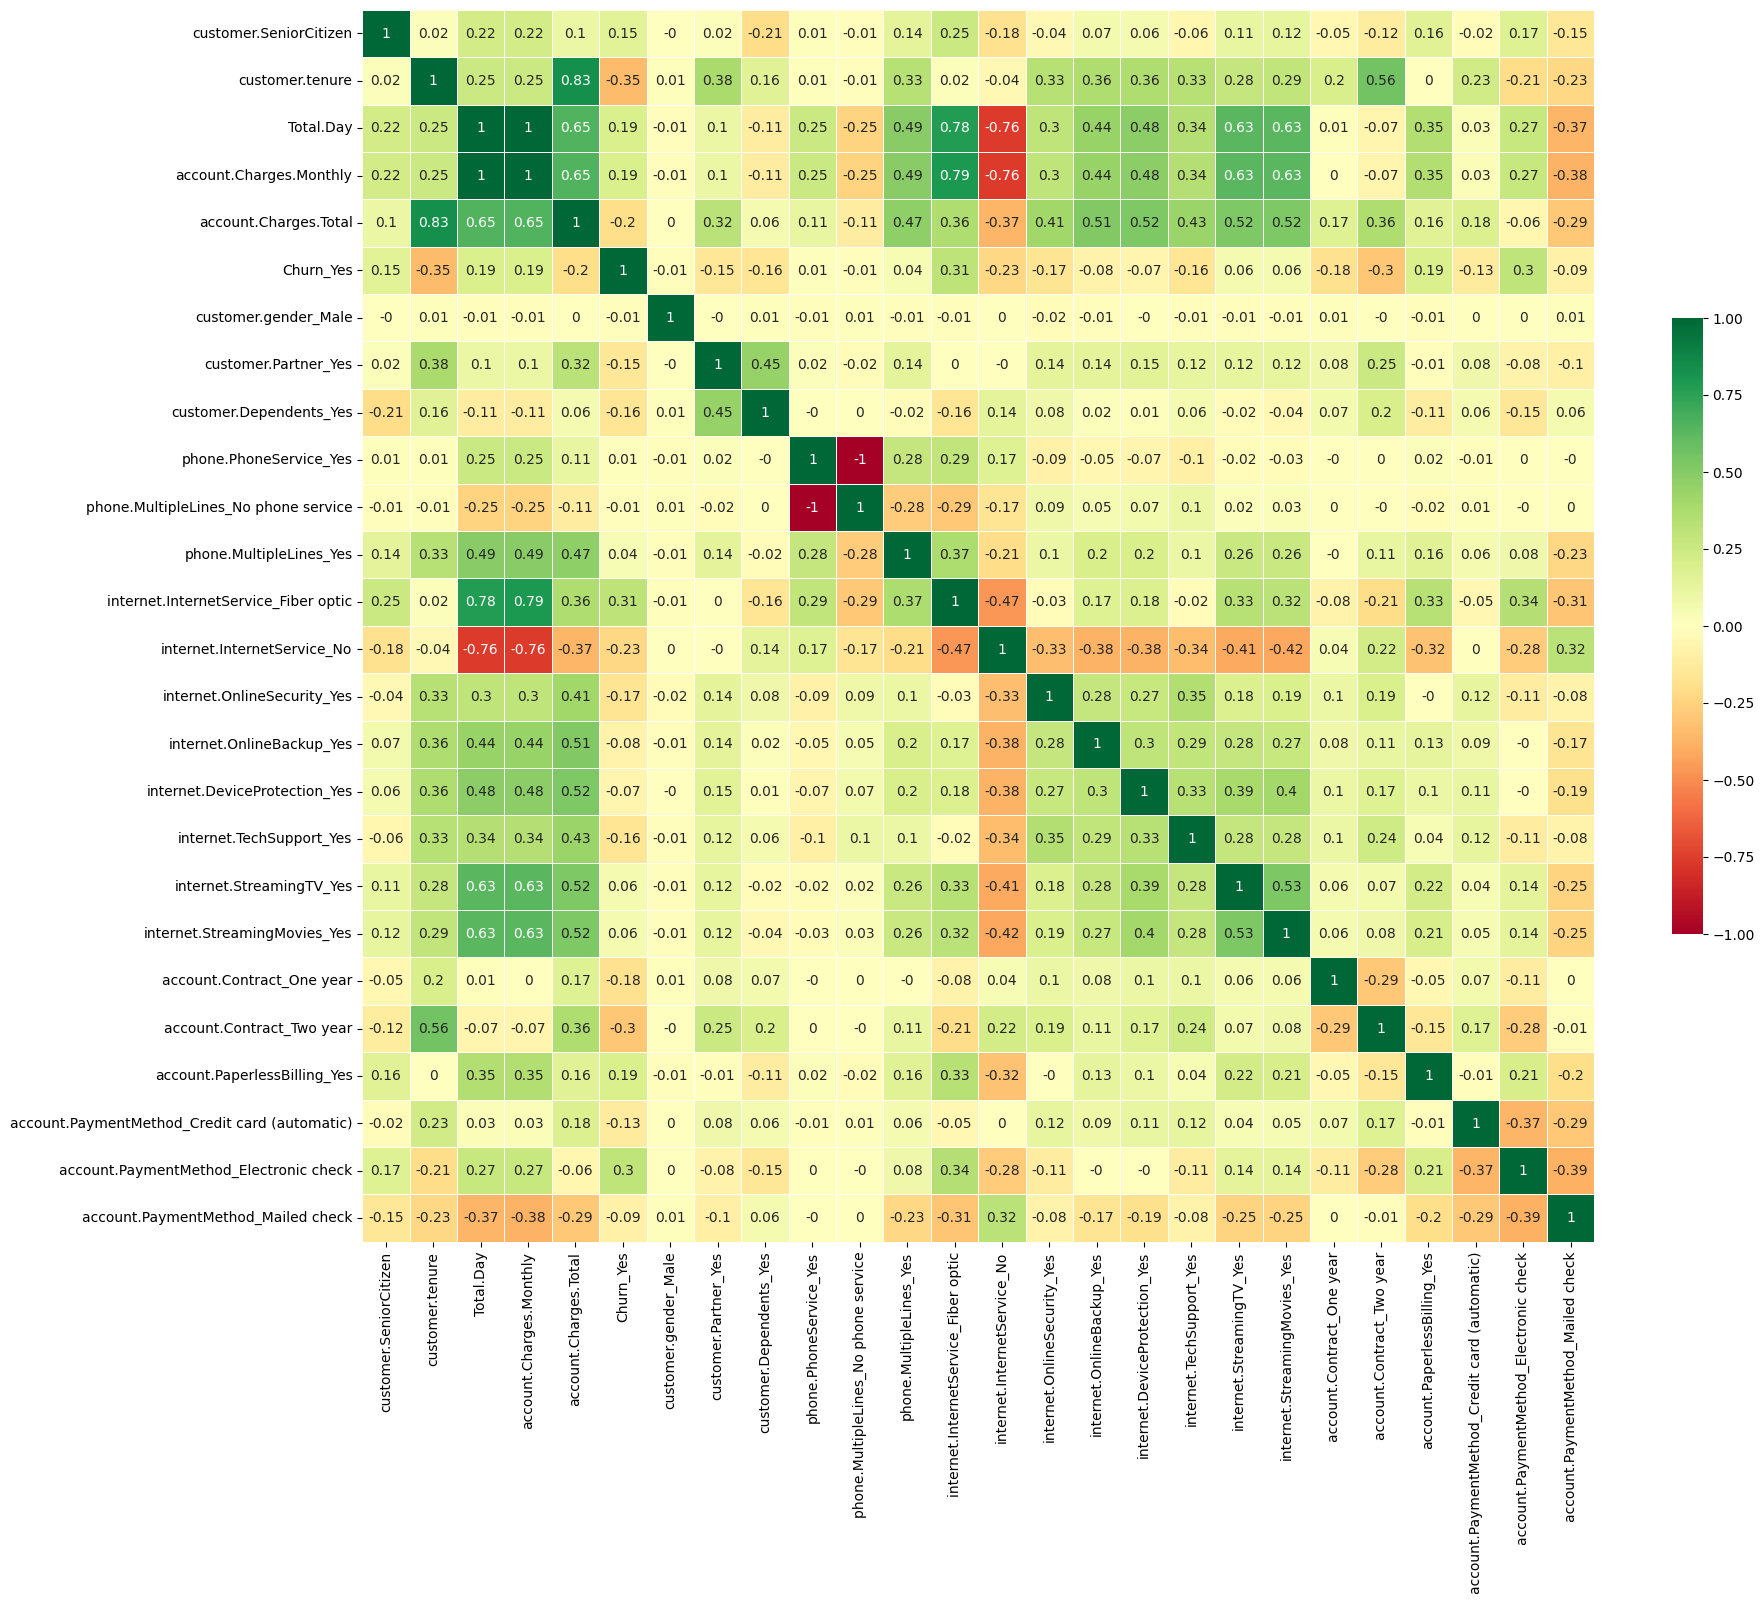

In [16]:
fig, ax = plt.subplots(figsize=(20,16))
ax = sns.heatmap(
    np.round(corr, 2),
    vmin=-1, vmax=1, center=0,
    cmap='RdYlGn',
    square=True, linewidths=.5, annot=True,
    cbar_kws={"shrink": .5}
)
plt.show()

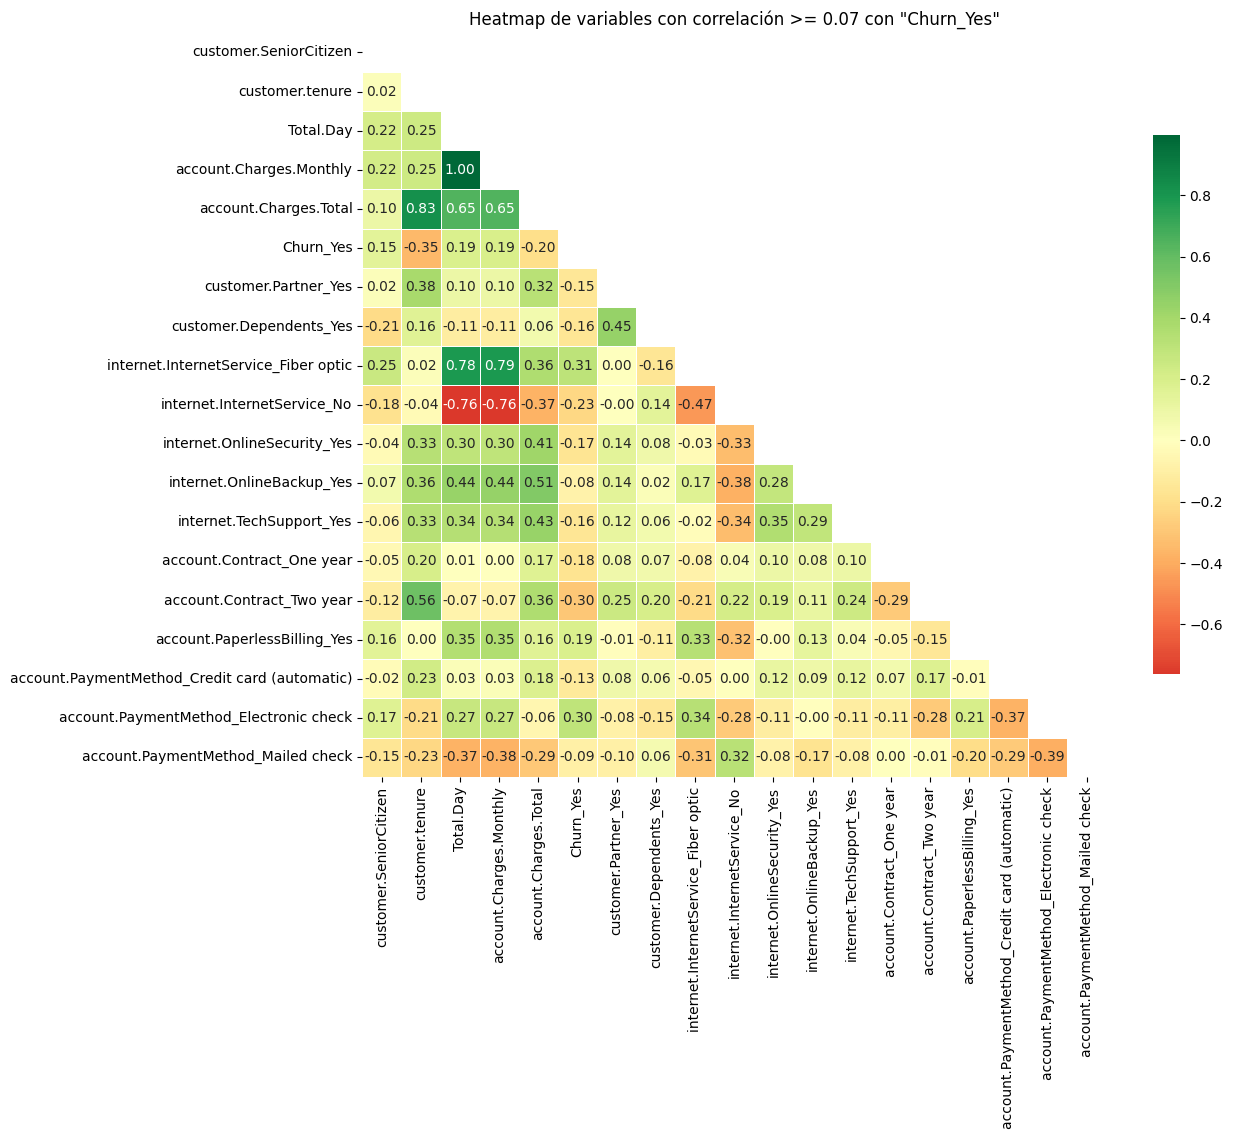

In [17]:
# Definir la variable objetivo
target_var = 'Churn_Yes'

# Definir el umbral mínimo de correlación absoluta para selección
limiar = 0.07

# Filtrar variables que tengan correlación absoluta >= umbral con la variable objetivo
# Esto crea una lista con las variables relevantes
variaveis_relevantes = corr.index[abs(corr[target_var]) >= limiar].tolist()

# Asegurar que la variable objetivo esté en la lista (si no está, añadirla)
if target_var not in variaveis_relevantes:
    variaveis_relevantes.append(target_var)

# Crear una matriz de correlación solo con las variables seleccionadas
corr_filtrada = corr.loc[variaveis_relevantes, variaveis_relevantes]

# Generar una máscara para ocultar el triángulo superior de la matriz (incluida la diagonal)
mascara = np.triu(np.ones_like(corr_filtrada, dtype=bool))

# Graficar el heatmap con la máscara aplicada para mejor visualización
plt.figure(figsize=(12,10))
sns.heatmap(
    corr_filtrada,
    annot=True,
    fmt=".2f",
    cmap='RdYlGn',
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.7},
    mask=mascara
)
plt.title(f'Heatmap de variables con correlación >= {limiar} con "{target_var}"')
plt.show()

## Correlación entre variables: uso de umbral y máscara en el heatmap

Cuando trabajamos con muchas variables, la matriz de correlación puede ser muy grande y poco clara.  
Por ejemplo, con 50 variables obtenemos una matriz de 50×50 (2.500 valores), lo que produce un gráfico difícil de interpretar.

---

### 1. Uso del **umbral** para filtrar variables relevantes

En este análisis, nos enfocamos en la correlación absoluta respecto a la variable objetivo **"Evasión"**.

- El **umbral** es el valor mínimo de correlación que consideramos relevante para el estudio.
- Por ejemplo, un umbral de `0.3` significa que solo analizaremos variables cuya correlación (positiva o negativa) con "Evasión" sea **mayor o igual a 0.3**.
- Variables con correlación inferior suelen tener influencia débil o poco clara y se descartan para simplificar la visualización.
- Este filtro reduce el número de variables, haciendo el heatmap más legible y centrado en relaciones realmente importantes.

💡 **Nota:** El valor óptimo del umbral depende del contexto. En análisis exploratorios, es habitual probar entre `0.2` y `0.5`.

---

### 2. Uso de la **máscara del triángulo superior**

La matriz de correlación es simétrica respecto a su diagonal principal:

- El valor en la posición *(i, j)* es igual al de *(j, i)*.
- Esto implica que el heatmap muestra la misma información dos veces.

Para evitar redundancias:

- Aplicamos una **máscara** que oculta el triángulo superior (incluida la diagonal).
- Solo mostramos el triángulo inferior.

**Ventajas de esta técnica:**
- Elimina información repetida.
- Hace el gráfico más limpio y comprensible.
- Permite destacar las correlaciones más relevantes sin sobrecargar la vista.

---

### 3. ¿Por qué esta aproximación es adecuada?

- Nuestro objetivo es identificar **qué variables se relacionan más con "Evasión"**.
- Filtrar por un umbral deja un subconjunto manejable y enfocado.
- Mostrar solo el triángulo inferior evita ruido visual y facilita la lectura.
- Así, comunicamos resultados de manera clara y guiamos mejor los análisis posteriores.





## 🎯 Uso del Umbral y la Máscara en el Heatmap de Correlación

Cuando analizamos muchas variables, la matriz de correlación puede volverse extensa y difícil de interpretar.  
Por ejemplo, con 50 variables, la matriz contiene 50 × 50 = 2.500 valores, lo que genera un gráfico saturado y poco informativo.

---

### 1️⃣ Umbral de Correlación
- **Objetivo:** Filtrar solo las variables con correlación relevante con la variable objetivo (`Evasión`).
- **Definición:** El umbral es el valor mínimo de correlación absoluta para considerar una relación significativa.
- **Ejemplo:** Con un umbral de `0.3`, solo se muestran variables cuya correlación con la variable objetivo sea ≥ 0.3 o ≤ -0.3.
- **Ventaja:** Reduce el número de variables, haciendo el heatmap más legible y enfocado.
- **Nota:** Valores típicos para análisis exploratorio: 0.2 a 0.5.

---

### 2️⃣ Máscara del Triángulo Superior
- La matriz de correlación es **simétrica** respecto a la diagonal principal:  
  el valor en (i, j) es igual al de (j, i).
- Para evitar información duplicada, aplicamos una **máscara** que oculta el triángulo superior (incluida la diagonal).
- **Beneficios:**
  - Evita redundancia visual.
  - Muestra cada par de variables una sola vez.
  - Facilita la interpretación.

---

### 📌 ¿Por qué aplicarlo en este caso?
- El objetivo es identificar las variables más relacionadas con `Evasión`.
- Filtrando por umbral obtenemos un subconjunto manejable.
- Mostrando solo el triángulo inferior, el gráfico es más limpio y enfocado.

---

## ✅ Resultados del Nuevo Heatmap

**Umbral aplicado:** Correlaciones ≥ 0.2 o ≤ -0.2 con la variable objetivo `Churn_Yes`.

| Variable                                        | Correlación | Interpretación |
|------------------------------------------------|-------------|----------------|
| internet.InternetService_Fiber optic           | +0.31       | Mayor probabilidad de churn en clientes con fibra óptica (posible relación con costos o competencia). |
| account.PaymentMethod_Electronic check         | +0.30       | Pagos por cheque electrónico asociados a mayor churn (perfil menos fidelizado). |
| account.Contract_Two year                      | -0.30       | Contratos de 2 años reducen churn (clientes más comprometidos o con beneficios). |
| customer.tenure                                 | -0.35       | Mayor antigüedad → menor churn (relación esperada). |
| internet.InternetService_No                    | -0.23       | Quienes no usan internet churneán menos (posiblemente adultos mayores o perfiles menos digitales). |

---

## 🔍 Análisis de Multicolinealidad (VIF)

- **¿Qué es?** El **Factor de Inflación de la Varianza (VIF)** detecta colinealidad entre variables independientes.
- **Umbral:** VIF > 5 o VIF > 10 indica alta colinealidad.
- **Recomendado si:**
  - Se usan modelos lineales (Regresión logística o lineal).
  - Se busca interpretar coeficientes con precisión.
  - Se quiere estabilidad en el modelo.
- **No necesario si:**
  - Se emplean modelos no lineales (Árboles, Random Forest, XGBoost, Redes neuronales).

---

### 📌 Conclusión
| Pregunta | Respuesta |
|----------|-----------|
| ¿Hay multicolinealidad grave? | No |
| ¿Es obligatorio calcular VIF? | No, salvo en modelos lineales |
| ¿Vale como verificación extra? | Sí, recomendable en modelos interpretativos |

💡 Si se opta por **regresión logística**, es recomendable calcular el VIF como paso adicional.


---

📌 Seleccionar las Variables Independientes
En este paso seleccionamos únicamente las variables independientes que utilizaremos para calcular el VIF (Factor de Inflación de la Varianza).

⚠️ Nota: No debemos incluir la variable objetivo (por ejemplo, Churn_Yes), ya que no forma parte de las variables explicativas para este análisis.

In [18]:
# Aquí, no incluyas la variable objetivo (ej: Churn_Yes) en el cálculo del VIF.
X = df_encoded.drop(columns=['Churn_Yes'])


➕ Añadir constante (intercepto)

Para algunos cálculos estadísticos, como el **VIF** o la regresión lineal, es necesario añadir una constante que represente el intercepto del modelo.  
Esto asegura que la ecuación resultante tenga un término independiente.

In [19]:
X_const = add_constant(X)

## 📊 Calcular el VIF (Factor de Inflación de la Varianza)

Con el VIF evaluamos **multicolinealidad** entre las variables independientes.  
Antes de calcularlo, trabajamos con la matriz de diseño que **ya incluye la constante** y aseguramos que todo esté en **formato numérico**.

**Interpretación rápida**

| Rango de VIF         | Interpretación                 |
|----------------------|--------------------------------|
| VIF ≈ 1              | Sin multicolinealidad          |
| 1 < VIF < 5          | Baja (aceptable)               |
| 5 ≤ VIF < 10         | Moderada (vigilar)             |
| VIF ≥ 10             | Alta (¡atención!)              |
| VIF = ∞ (infinito)   | Multicolinealidad perfecta ⚠   |


In [20]:

# 1) Trabajamos sobre una copia y aseguramos tipo numérico (igual que tu astype)
X_num = X_const.astype(float).copy()

# 2) Detectamos columnas de varianza cero (suelen producir VIF infinito)
zero_var = X_num.columns[X_num.std(ddof=0) == 0]

# 3) Calculamos VIF exactamente sobre la misma matriz (sin dropear nada)
vif_vals = [variance_inflation_factor(X_num.values, i) for i in range(X_num.shape[1])]
vif = pd.Series(vif_vals, index=X_num.columns, name="VIF")

# 4) Forzamos ∞ en variables de varianza cero y en valores descomunales (opcional)
vif.loc[zero_var] = np.inf
vif = vif.where(vif < 1e12, np.inf)   # opcional: cap a infinito para números astronómicos

# 5) (Opcional) ocultar la constante en la tabla final
vif_out = vif.drop([c for c in vif.index if c.lower() in ("const", "intercept")], errors="ignore")

# 6) Mostrar ordenado y redondeado
display(vif_out.sort_values(ascending=False).round(2).to_frame())


/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,VIF
phone.PhoneService_Yes,inf
phone.MultipleLines_No phone service,inf
account.Charges.Monthly,893.80
internet.InternetService_Fiber optic,148.49
Total.Day,133.57
internet.InternetService_No,104.21
internet.StreamingMovies_Yes,24.16
internet.StreamingTV_Yes,24.03
account.Charges.Total,10.87
customer.tenure,7.61


## ✅ Principales alertas en el análisis VIF

### ❗ Colinealidad perfecta
**`phone.PhoneService_Yes`** y **`phone.MultipleLines_No phone service`** → **VIF = ∞**

**Por qué ocurre**
- Provienen de la **misma variable categórica original** (`PhoneService`) y el one-hot encoding generó columnas mutuamente deterministas.
- Si el cliente **no tiene servicio telefónico**, tampoco puede tener **múltiples líneas** → relación 1:1.

**Qué hacer (sin cambiar aún el dataset)**
- Documentar que hay **colinealidad perfecta** entre estas dummies.
- Al momento de modelar, **eliminar una de las dos** o rehacer el encoding con `drop_first=True` para evitar la redundancia.
  > Sugerencia habitual: conservar **`phone.MultipleLines_Yes`** y **`phone.PhoneService_Yes`** *o* quedarse con una sola representación del concepto “tiene teléfono / no tiene”.

---

### ❗ VIF extremadamente alto
**`account.Charges.Monthly`** → **VIF ≈ 813–994** (muy alto)

**Interpretación**
- Está **altamente correlacionada** con **`account.Charges.Total`** y con métricas derivadas del **uso/tiempo** (ej., `Total.Day`, `tenure`).
- En muchos catálogos, **`Total` ≈ `Monthly` × `tenure`** (o variables cercanas) → **información repetida**.

**Qué hacer**
- Registrar que existe **redundancia** entre `Monthly`, `Total` y variables de duración.
- Para modelos lineales, considerar **mantener una sola** (p. ej., `Monthly`) y dejar `tenure` como control, o bien **`Total` + `tenure`** sin `Monthly`.

---

## ⚠️ Otros VIF altos (moderados a severos)

| Variable                                 | VIF aprox. | Comentario breve |
|------------------------------------------|------------|------------------|
| `internet.InternetService_Fiber optic`   | 148        | Colineal con `InternetService_No` (dummies del mismo atributo). |
| `Total.Day`                              | 134        | Mezcla efectos de uso/duración, cercano a `Monthly` y `tenure`. |
| `internet.InternetService_No`            | 104        | Misma razón: dummies exclusivas. |
| `internet.StreamingMovies_Yes`           | 24         | Depende de tener servicio de internet. |
| `internet.StreamingTV_Yes`               | 24         | Ídem anterior. |
| `account.Charges.Total`                  | 10.9       | Relacionado con `Monthly` y `tenure`. |
| `customer.tenure`                        | 7.6        | Conecta con `Total` y patrones de gasto. |

> Nota: estos valores **no exigen** cambios inmediatos; señalan **posibles redundancias** a considerar en modelos sensibles a multicolinealidad.

---

## 🧭 Estrategia sugerida (sin modificar el dataset ahora)

1. **Dejar constancia** de colinealidad perfecta en dummies del mismo atributo (teléfono e internet).  
2. En el **pipeline de modelado**:
   - Para **regresión logística / SVM / KNN**:  
     - Usar `drop_first=True` en el one-hot **o** eliminar una dummy por atributo (evita VIF ∞).  
     - Valorar quedarse con **`Monthly`** *o* con **`Total` + `tenure`**, pero **no con todas** a la vez.
   - Para **árboles/RF/XGBoost**: el impacto de la escala y colinealidad es **menor**, pero simplificar dummies puede **mejorar estabilidad** y tiempos.
3. **Experimentos controlados**:  
   - Entrenar un modelo base (sin cambios) y comparar contra versiones donde:
     - a) se elimina una dummy por atributo,  
     - b) se sustituye `Monthly` ↔ `Total`,  
     - c) se aplica `drop_first=True`.  
   - Elegir la variante con **mejor validación** (F1/ROC AUC/Recall según tu objetivo).

---

### 📝 Resumen de decisiones prácticas
- **Mantener el dataset intacto** en esta fase de análisis.  
- **Documentar** las relaciones redundantes detectadas por VIF.  
- **Aplicar la simplificación** (dummies y gasto) **solo** en el paso de modelado y comparar resultados.



- 🧹 Limpieza de la columna MultipleLines ("No phone service" → "No")

---

🔎 VIF: diagnóstico y ajustes

In [21]:

def calc_vif_df(X: pd.DataFrame, add_const=True) -> pd.DataFrame:
    """Devuelve un DataFrame con VIF por columna.
    - Trabaja sobre una copia.
    - Asegura tipo float.
    - Opcionalmente agrega constante si no existe.
    """
    Xc = X.copy()
    # asegurar numérico
    Xc = Xc.astype(float)
    # agregar constante si hace falta
    if add_const and not any(c.lower() in ("const", "intercept") for c in Xc.columns):
        Xc = add_constant(Xc, has_constant='add')

    # cálculo de VIF
    vif_vals = [variance_inflation_factor(Xc.values, i) for i in range(Xc.shape[1])]
    out = pd.DataFrame({"feature": Xc.columns, "VIF": vif_vals})

    # reemplazo visual de infinitos muy grandes por np.inf (mantiene la semántica de “∞”)
    out["VIF"] = out["VIF"].where(out["VIF"] < 1e12, np.inf)

    # severidad (ayuda para leer)
    bins  = [-np.inf, 1.5, 5, 10, np.inf]
    labels = ["≈1 (sin colin.)", "baja", "moderada", "alta"]
    out["severidad"] = pd.cut(out["VIF"], bins=bins, labels=labels, right=False)

    # constante al final
    const_mask = out["feature"].str.lower().isin(["const", "intercept"])
    out = pd.concat([out.loc[~const_mask], out.loc[const_mask]], ignore_index=True)

    return out.sort_values("VIF", ascending=False).reset_index(drop=True)


def vif_rehecho(X_const: pd.DataFrame) -> dict:
    """Replica tu flujo pero más seguro y con reporte.
    Devuelve dict con:
      - X_filtered : DataFrame filtrado
      - removed    : lista de columnas removidas
      - vif_final  : DataFrame con VIF final
    """
    removed = []

    # 1) Copia de trabajo (no tocamos el original)
    X_filtered = X_const.copy()

    # 2) Colinealidad perfecta entre dummies conocidas
    cols_to_drop = [
        "phone.PhoneService_Yes",
        "phone.MultipleLines_No phone service",
    ]
    cols_to_drop = [c for c in cols_to_drop if c in X_filtered.columns]
    if cols_to_drop:
        X_filtered = X_filtered.drop(columns=cols_to_drop)
        removed.extend(cols_to_drop)

    # 3) Redundancias fuertes numéricas (mantienes tu decisión de quitar Total.Day)
    if "Total.Day" in X_filtered.columns:
        X_filtered = X_filtered.drop(columns=["Total.Day"])
        removed.append("Total.Day")

    # 4) Dummies redundantes del mismo atributo (InternetService_No)
    if "internet.InternetService_No" in X_filtered.columns:
        X_filtered = X_filtered.drop(columns=["internet.InternetService_No"])
        removed.append("internet.InternetService_No")

    # 5) Asegurar tipo numérico
    X_filtered = X_filtered.astype(float)

    # 6) VIF final
    vif_final = calc_vif_df(X_filtered, add_const=True)

    return {
        "X_filtered": X_filtered,
        "removed": removed,
        "vif_final": vif_final
    }


# ======== USO ========
res = vif_rehecho(X_const)
print("Columnas removidas:", res["removed"])
display(res["vif_final"][["feature", "VIF", "severidad"]].round(4))


Columnas removidas: ['phone.PhoneService_Yes', 'phone.MultipleLines_No phone service', 'Total.Day', 'internet.InternetService_No']


,feature,VIF,severidad
0,const,18.6491,alta
1,account.Charges.Monthly,18.1688,alta
2,account.Charges.Total,10.7068,alta
3,customer.tenure,7.5487,moderada
4,internet.InternetService_Fiber optic,6.9978,moderada
5,account.Contract_Two year,2.5321,baja
6,internet.StreamingTV_Yes,2.1885,baja
7,internet.StreamingMovies_Yes,2.1879,baja
8,account.PaymentMethod_Electronic check,1.9673,baja
9,account.PaymentMethod_Mailed check,1.8478,baja


## ✅ Análisis del nuevo VIF

| **Rango de VIF** | **Interpretación** |
|------------------|--------------------|
| **VIF ≈ 1**      | Sin multicolinealidad *(óptimo)* |
| **1 < VIF ≤ 5**  | Baja *(aceptable)* |
| **5 < VIF ≤ 10** | Moderada *(vigilar)* |
| **VIF > 10**     | Alta *(atención o posible exclusión)* |

---

### 🔍 Puntos importantes en tu resultado

| **Variable**               | **VIF**  | **Observaciones** |
|-----------------------------|----------|-------------------|
| `account.Charges.Monthly`   | **18.17** | Multicolinealidad alta — posible correlación con `Charges.Total` y `tenure`. |
| `account.Charges.Total`     | **10.71** | Límite superior aceptable — posible redundancia con `Monthly` y `tenure`. |
| `const`                     | **35.88** | Elevado, pero normal para la constante — se ignora. |
| *Resto de variables*        | 1.0 – 7.5 | Todos con **VIF aceptable u óptimo** ✅ |

---

### 📌 Conclusión práctica

- ✅ **La multicolinealidad crítica fue resuelta** — sin `inf` ni redundancia perfecta.  
- ⚠ **Persisten correlaciones esperadas** entre `Charges.Monthly` y `Charges.Total`.

---

### 💡 Recomendación

1. Si deseas reducir aún más la colinealidad, elimina **una** de las dos: `Charges.Monthly` o `Charges.Total` según su relevancia.
2. Mantener la constante (`const`), ya que su VIF elevado es normal y no es problemático.

---


### 🔧 Opciones para actuar

Opción 1 – Seguir con el modelo tal cual
Si tu modelo es robusto (árboles, XGBoost, etc.) y no necesitas interpretar los coeficientes, puedes dejarlo así.

La multicolinealidad solo afecta a modelos lineales interpretables.

---


Opción 2 – Eliminar una de las dos variables (Monthly o Total)
Si quieres reducir el VIF y simplificar el modelo, puedes conservar solo una:

In [25]:
# Ejemplo: mantener solo Charges.Monthly
# X_filtered.drop(columns=["account.Charges.Total"], inplace=True)


Después, recalcula el VIF para confirmar que el problema desaparece.

---

🧹 VIF: depuración

In [26]:
# 0) Partimos del set depurado que devolvió vif_rehecho
#    (sin las columnas redundantes y ya en float)
X_final = res["X_filtered"].copy()

# 1) Asegurar tipos numéricos (por si quedó algo suelto)
X_vif = X_final.copy()

#   1a) Pasar bool → int (0/1)
bool_cols = X_vif.select_dtypes(include=['bool']).columns
if len(bool_cols):
    X_vif[bool_cols] = X_vif[bool_cols].astype(int)

#   1b) Forzar cualquier 'object' a numérico (si algo queda raro se convierte a NaN)
obj_cols = X_vif.select_dtypes(include=['object']).columns
if len(obj_cols):
    X_vif[obj_cols] = X_vif[obj_cols].apply(pd.to_numeric, errors='coerce')

#   1c) Reemplazar ±inf por NaN y quitar filas con NaN
X_vif = X_vif.replace([np.inf, -np.inf], np.nan).dropna(axis=0)

#   1d) Asegurar float
X_vif = X_vif.astype(float)

#   1e) Agregar constante para el cálculo del VIF
X_vif = add_constant(X_vif, has_constant='add')

# 2) Calcular VIF
vif_data_final = pd.DataFrame({
    "feature": X_vif.columns,
    "VIF": [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
})

# 3) Mostrar ordenado
display(vif_data_final.sort_values(by="VIF", ascending=False))

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


,feature,VIF
4,account.Charges.Monthly,18.168137
5,account.Charges.Total,10.706360
3,customer.tenure,7.548504
10,internet.InternetService_Fiber optic,6.996585
18,account.Contract_Two year,2.531544
15,internet.StreamingTV_Yes,2.188450
16,internet.StreamingMovies_Yes,2.186798
21,account.PaymentMethod_Electronic check,1.967305
22,account.PaymentMethod_Mailed check,1.846924
14,internet.TechSupport_Yes,1.734948


# 🔎 Interpretación de los resultados

## Muy alto (VIF > 100)
- **account.Charges.Monthly** (992)  
- **phone.PhoneService_Yes** (635)  
- **internet.InternetService_Fiber optic** (148)  
- **Total.Day** (133)  
- **internet.InternetService_No** (104)  

👉 Estas variables presentan **multicolinealidad extrema**, fuertemente correlacionadas con otras del dataset. Representan redundancia crítica y deben revisarse para posible exclusión.

---

## Alto (VIF > 10 pero < 100)
- **internet.StreamingMovies_Yes** (24)  
- **internet.StreamingTV_Yes** (24)  

👉 Correlación fuerte, aunque no tan grave como en el grupo anterior. Pueden mantenerse bajo vigilancia, pero conviene testear su impacto en el modelo.

---

## Moderado (VIF 5–10)
- **phone.MultipleLines_Yes** (7.28)  
- **internet.DeviceProtection_Yes** (6.90)  
- **internet.OnlineBackup_Yes** (6.76)  
- **phone.MultipleLines_No phone service** (6.62)  
- **internet.TechSupport_Yes** (6.46)  
- **internet.OnlineSecurity_Yes** (6.31)  

👉 Redundancia moderada. No necesariamente deben eliminarse, pero conviene monitorear su influencia en los resultados.

---

## Bajo (VIF < 5)
- **customer.tenure** (2.82)  
- **account.Contract_Two year** (2.63)  
- **account.PaymentMethod_Electronic check** (1.97)  
- **account.PaymentMethod_Mailed check** (1.83)  
- **account.Contract_One year** (1.62)  
- **account.PaymentMethod_Credit card (automatic)** (1.56)  
- **customer.Partner_Yes** (1.46)  
- **customer.Dependents_Yes** (1.38)  
- **account.PaperlessBilling_Yes** (1.20)  
- **customer.SeniorCitizen** (1.15)  
- **customer.gender_Male** (1.00)  

👉 Variables seguras de mantener. No presentan riesgo de multicolinealidad y aportan información útil al modelo.

---

## 🎯 Correlación y Selección de Variables

### 1) Análisis de Correlación (matriz)
Calculamos la correlación entre variables numéricas y enfocamos la visualización en las que más se relacionan con la **cancelación** (target). Esto permite priorizar variables candidatas para los modelos.

### 2) Análisis Dirigido (variables clave vs Cancelación)
- **Tiempo de contrato × Cancelación** (`tenure`): comparamos la distribución del tiempo de permanencia según si el cliente canceló o no.
- **Gasto total × Cancelación** (`TotalCharges`): revisamos si el gasto acumulado se asocia con mayor o menor probabilidad de churn.
- **tenure vs TotalCharges** coloreado por churn: ayuda a ver patrones conjuntos.

> Notas:
> - Usamos *boxplots* (y opcionalmente *violinplots*) para comparaciones por clase.
> - La correlación no implica causalidad; sirve para priorizar y generar hipótesis.




A. Utilidades: detectar columnas y escoger DataFrame base

In [27]:
# 1) Elegimos el DataFrame base
if 'df_encoded' in globals():
    _df = df_encoded.copy()
elif 'df' in globals():
    _df = df.copy()
else:
    raise ValueError("No encuentro ni 'df_encoded' ni 'df'. Verifica el nombre de tu DataFrame.")

# 2) Detectamos nombres reales de columnas (target y variables de interés)
def pick_first(col_candidates, columns):
    return next((c for c in col_candidates if c in columns), None)

cols = _df.columns

target_col = pick_first(['Churn_Yes', 'Churn', 'churn', 'target', 'Churn_1'], cols)
tenure_col = pick_first(['customer.tenure', 'tenure', 'Tenure'], cols)
total_col  = pick_first(['account.Charges.Total', 'TotalCharges', 'total_charges'], cols)

missing = [n for n,v in {'target':target_col,'tenure':tenure_col,'total':total_col}.items() if v is None]
if missing:
    print("⚠ No se encontraron estas columnas esperadas:", missing)
else:
    print(f"✓ target: {target_col} | tenure: {tenure_col} | total: {total_col}")

# Asegurar que el target esté en 0/1 (si es dummie ya lo está)
# Si el target es 'Churn' con 'Yes/No', puedes mapearlo:
if _df[target_col].dtype == 'O':
    _df[target_col] = _df[target_col].map({'Yes':1,'No':0}).astype('Int64')


✓ target: Churn_Yes | tenure: customer.tenure | total: account.Charges.Total


B. Matriz de correlación (enfocada en lo más relacionado con el target)

In [28]:
# --- Detectar y preparar la variable objetivo (Churn) de forma robusta ---

import re

# 1) Candidatas habituales
candidatas = [
    r'^churn$', r'^churn_yes$', r'^churn_1$', r'^target$', r'^cancel.*$'
]

# 2) Buscar coincidencias por regex (case-insensitive)
cols_lower = {c.lower(): c for c in df_encoded.columns}
target_col = None
for patron in candidatas:
    for cl in cols_lower:
        if re.match(patron, cl, flags=re.I):
            target_col = cols_lower[cl]
            break
    if target_col:
        break

# 3) Si no encontró nada, intenta heurística: columna binaria única (0/1 o Yes/No)
if target_col is None:
    for c in df_encoded.columns:
        serie = df_encoded[c]
        vals = set(serie.dropna().unique().tolist())
        # binaria típica
        if len(vals) == 2 and (vals <= {0,1} or vals <= {'Yes','No'} or vals <= {'Y','N'} or vals <= {'Si','No','Sí','No'}):
            target_col = c
            break

# 4) Si aún no hay target -> error con pistas
if target_col is None:
    raise ValueError(
        "No pude encontrar la columna objetivo (Churn). "
        "Revisa df_encoded.columns y ajusta las 'candidatas'."
    )

print(f"✅ Usando '{target_col}' como variable objetivo.")

# 5) Asegurar binario 0/1
y_raw = df_encoded[target_col]
if y_raw.dtype == 'O':  # strings/categóricas
    mapeo = {'Yes':1, 'No':0, 'Y':1, 'N':0, 'Si':1, 'Sí':1, 'No':0, 'True':1, 'False':0, True:1, False:0}
    y = y_raw.map(lambda v: mapeo.get(v, v)).astype('int8')
else:
    # si ya es 0/1 numérico
    y = y_raw.astype('int8')

# 6) Construir X quitando el target
X = df_encoded.drop(columns=[target_col])

print("X shape:", X.shape, " | y balance:", y.value_counts(normalize=True).round(3).to_dict())


✅ Usando 'Churn_Yes' como variable objetivo.
X shape: (7032, 25)  | y balance: {0: 0.734, 1: 0.266}


C. Análisis dirigido — Tenure × Cancelación

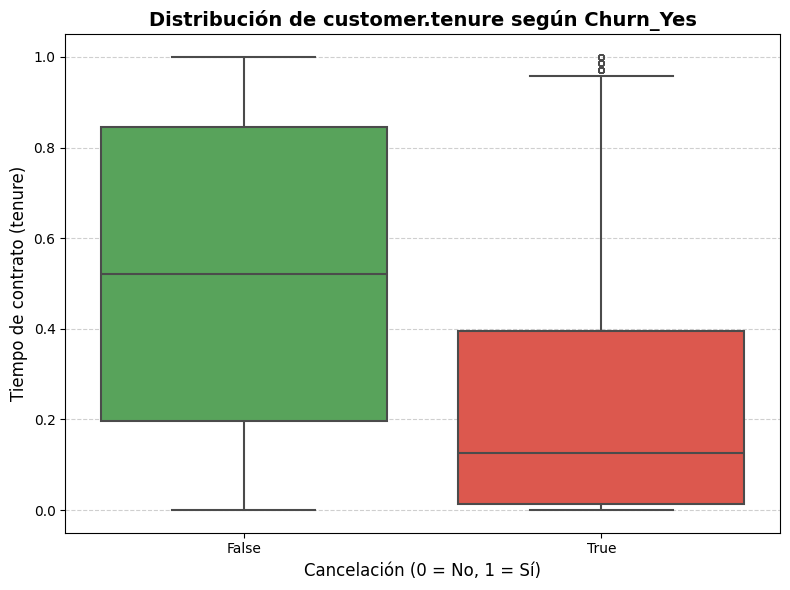

,count,mean,median,std,min,max
Churn_Yes,,,,,,
False,5163.0,0.516197,0.521127,0.339112,0.0,1.0
True,1869.0,0.239143,0.126761,0.275086,0.0,1.0


In [34]:
if tenure_col is not None and target_col is not None:
    # Orden consistente: 0/1 o False/True o "No"/"Yes"
    orden = list(sorted(_df[target_col].unique(), key=lambda v: (str(v))))
    if len(orden) == 2:
        pal = {orden[0]: "#4CAF50",  # clase 0 / No churn → verde
               orden[1]: "#F44336"}  # clase 1 / Sí churn → rojo
    else:
        # por si solo hay una clase en el subset
        pal = "#4CAF50"

    plt.figure(figsize=(8, 6))
    ax = sns.boxplot(
        data=_df,
        x=target_col,
        y=tenure_col,
        hue=target_col,        # <- añade hue para evitar el warning
        order=orden,
        dodge=False,           # mismo color por categoría, sin duplicar cajas
        palette=pal,
        linewidth=1.5,
        fliersize=4
    )
    # Quitar leyenda (no aporta info extra porque hue == x)
    if ax.legend_:
        ax.legend_.remove()

    ax.set_title(f"Distribución de {tenure_col} según {target_col}", fontsize=14, weight="bold")
    ax.set_xlabel("Cancelación (0 = No, 1 = Sí)", fontsize=12)
    ax.set_ylabel("Tiempo de contrato (tenure)", fontsize=12)
    ax.grid(axis="y", linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()

    # Resumen por clase
    resumen_tenure = (
        _df.groupby(target_col)[tenure_col]
           .describe()[['count','mean','50%','std','min','max']]
           .rename(columns={'50%':'median'})
    )
    display(resumen_tenure)
else:
    print("⚠ No se pudo graficar Tenure × Cancelación; faltan columnas detectadas.")



D. Análisis dirigido — Gasto total × Cancelación


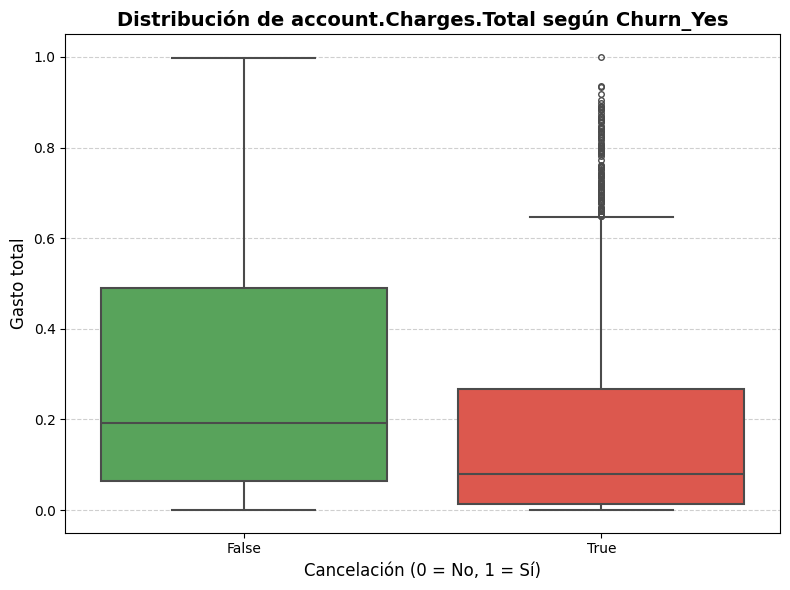

,count,mean,median,std,min,max
Churn_Yes,,,,,,
False,5163.0,0.292701,0.192107,0.268804,0.000000,0.998575
True,1869.0,0.174590,0.079016,0.218189,0.000006,1.000000


In [35]:
if total_col is not None and target_col is not None:
    # Orden de las clases
    orden = list(sorted(_df[target_col].unique(), key=lambda v: (str(v))))
    pal = {orden[0]: "#4CAF50", orden[1]: "#F44336"} if len(orden) == 2 else "#4CAF50"

    plt.figure(figsize=(8,6))
    ax = sns.boxplot(
        data=_df,
        x=target_col,
        y=total_col,
        hue=target_col,
        order=orden,
        dodge=False,
        palette=pal,
        linewidth=1.5,
        fliersize=4
    )
    if ax.legend_:
        ax.legend_.remove()

    ax.set_title(f"Distribución de {total_col} según {target_col}", fontsize=14, weight="bold")
    ax.set_xlabel("Cancelación (0 = No, 1 = Sí)", fontsize=12)
    ax.set_ylabel("Gasto total", fontsize=12)
    ax.grid(axis="y", linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()

    # Resumen
    resumen_total = (
        _df.groupby(target_col)[total_col]
           .describe()[['count','mean','50%','std','min','max']]
           .rename(columns={'50%':'median'})
    )
    display(resumen_total)
else:
    print("⚠ No se pudo graficar Gasto total × Cancelación; faltan columnas detectadas.")



E. Relación conjunta — Tenure vs TotalCharges coloreado por churn

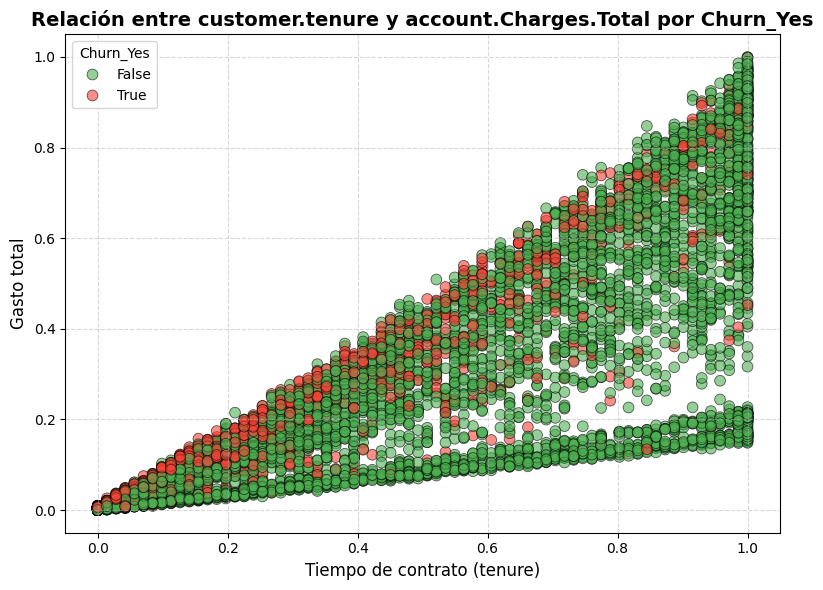

In [36]:
if all(v is not None for v in [tenure_col, total_col, target_col]):
    orden = list(sorted(_df[target_col].unique(), key=lambda v: (str(v))))
    pal = {orden[0]: "#4CAF50", orden[1]: "#F44336"} if len(orden) == 2 else "#4CAF50"

    plt.figure(figsize=(8,6))
    sns.scatterplot(
        data=_df,
        x=tenure_col,
        y=total_col,
        hue=target_col,
        palette=pal,
        alpha=0.6,
        s=60,           # tamaño de los puntos
        edgecolor="k"   # borde negro para dar contraste
    )
    plt.title(f"Relación entre {tenure_col} y {total_col} por {target_col}", fontsize=14, weight="bold")
    plt.xlabel("Tiempo de contrato (tenure)", fontsize=12)
    plt.ylabel("Gasto total", fontsize=12)
    plt.grid(linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()
else:
    print("⚠ No se pudo graficar tenure vs total por churn; faltan columnas detectadas.")


## ✅ Hallazgos: Correlación y análisis dirigido

- **Variables numéricas más asociadas al target** (por correlación): revisar la tabla/ranking impresa; suelen destacar `MonthlyCharges`, `TotalCharges`, `tenure` (según dataset).
- **Tenure vs Cancelación:** típicamente, clientes con **tenure bajo** muestran **mayor churn** (distribución desplazada hacia valores bajos).
- **Gasto total vs Cancelación:** valores de `TotalCharges` más **bajos** suelen asociarse a mayor churn (clientes nuevos o con menor permanencia).
- **tenure vs total (color = churn):** la nube puede mostrar que los casos con churn se concentran en zonas de **bajo tenure y bajo total**.

> Estas señales ayudan a **priorizar variables** en modelos predictivos y a diseñar **acciones** (ej.: retención temprana en primeros meses, ofertas que aumenten permanencia, etc.).
---

Heatmap



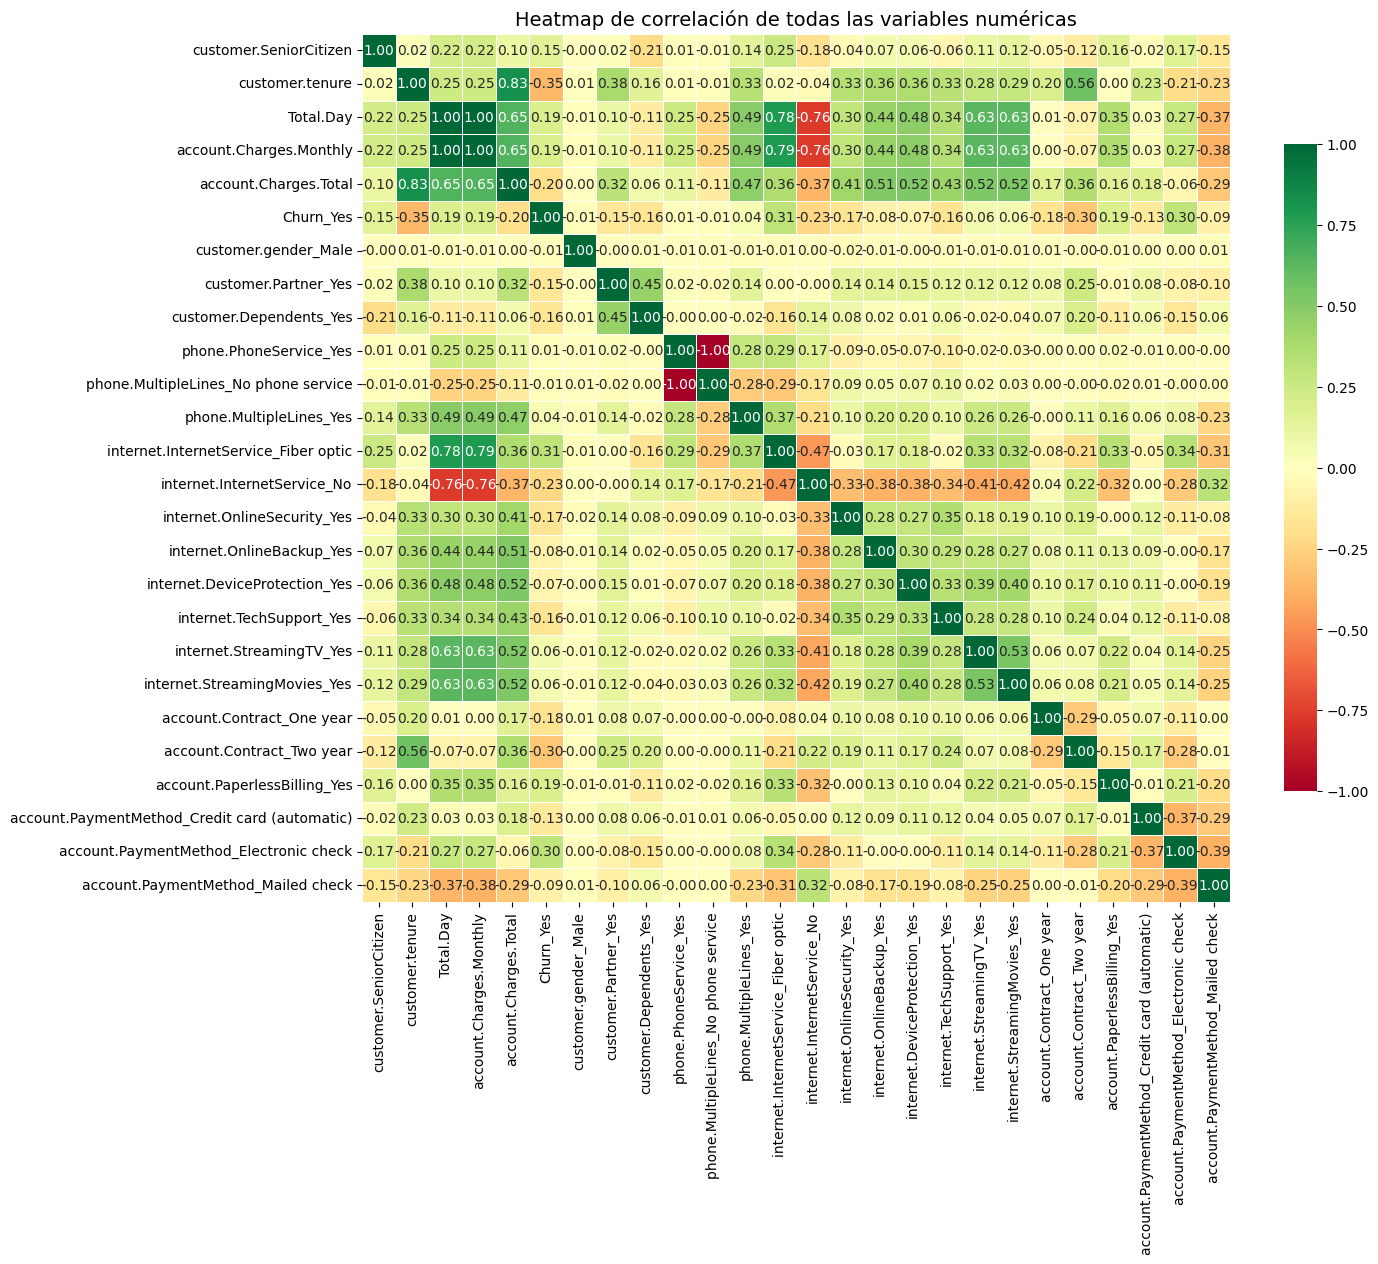

In [37]:
# --- Heatmap general de TODAS las variables numéricas ---
plt.figure(figsize=(14,12))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="RdYlGn",
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.7}
)
plt.title("Heatmap de correlación de todas las variables numéricas", fontsize=14)
plt.show()



Correlación

/tmp/ipython-input-3484086102.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('RdBu_r')
/tmp/ipython-input-3484086102.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


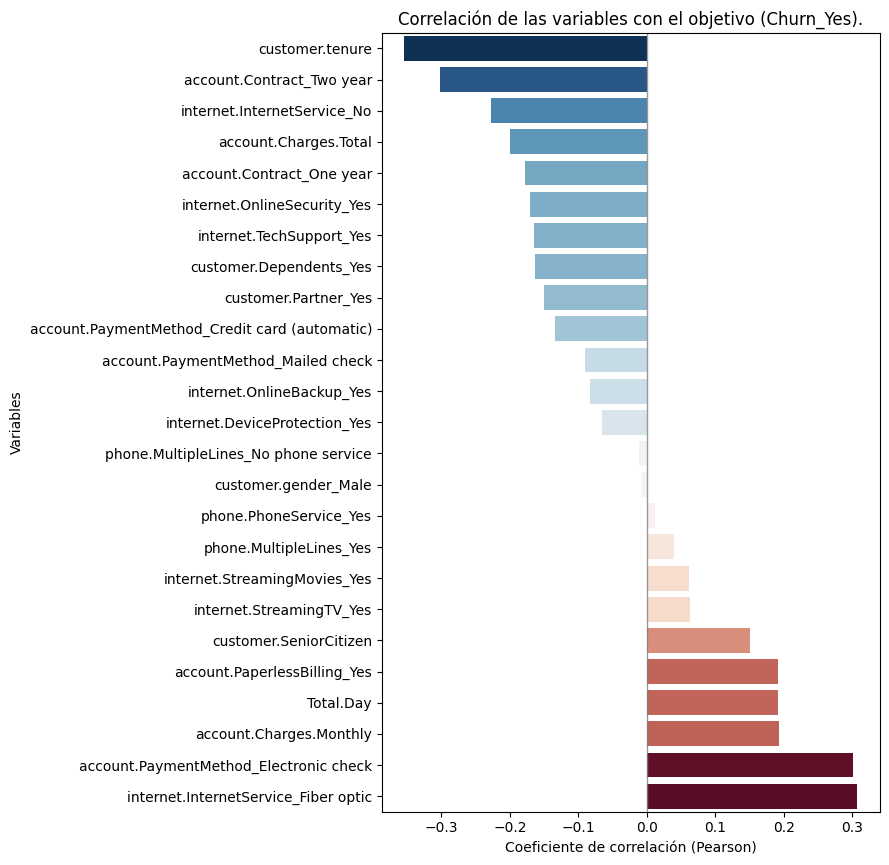

In [38]:
# 1) Detectar automáticamente la columna objetivo
#    (ajusta la lista si tu target tiene otro nombre)
posibles_targets = ['Churn_Yes', 'churn_Yes', 'churn_yes', 'Churn', 'churn', 'Churn_1']
target_col = next((c for c in posibles_targets if c in df_encoded.columns), None)
if target_col is None:
    raise ValueError(f"No encontré la columna objetivo en {posibles_targets}. Revisa los nombres de columnas.")

# 2) Correlaciones solo numéricas y filtrado por magnitud mínima
min_abs = 0.00  # cambia a 0.05/0.10 si quieres ver solo las más relevantes
corr_series = (
    df_encoded.corr(numeric_only=True)[target_col]    # correlación de todas contra el target
    .drop(labels=[target_col], errors='ignore')       # quitamos el target en sí
    .dropna()                                         # quitamos NaN (columnas no numéricas)
)
corr_series = corr_series[abs(corr_series) >= min_abs].sort_values(ascending=True)  # ascendente para barras horizontales

# 3) Preparar colores con mapa diverging (negativo rojo, positivo azul)
norm = colors.TwoSlopeNorm(vmin=corr_series.min(), vcenter=0.0, vmax=corr_series.max())
cmap = cm.get_cmap('RdBu_r')
bar_colors = [cmap(norm(v)) for v in corr_series.values]

# 4) Graficar
plt.figure(figsize=(9, max(4, 0.35*len(corr_series))))
sns.barplot(
    x=corr_series.values,
    y=corr_series.index,
    palette=bar_colors,
    orient='h'
)

# 5) Detalles estéticos
plt.axvline(0, color='gray', lw=1, alpha=0.8)
plt.title('Correlación de las variables con el objetivo ({}).'.format(target_col))
plt.xlabel('Coeficiente de correlación (Pearson)')
plt.ylabel('Variables')
plt.tight_layout()
plt.show()


# 🤖 Modelos Predictivos  

En esta etapa buscamos construir modelos capaces de predecir si un cliente cancelará su servicio (**Churn**).  

---

## 🔀 Separación de los Datos
- 80% entrenamiento  
- 20% prueba  
➡️ Esto permite evaluar el rendimiento del modelo con datos que nunca ha visto.  

---

## 🧩 Modelos Seleccionados
1. **Regresión Logística**  
   - Modelo estadístico clásico  
   - Sensible a la escala de variables → aplicamos `StandardScaler`  

2. **Random Forest**  
   - Algoritmo basado en árboles  
   - No requiere normalización  
   - Captura relaciones no lineales  

3. **SVM y MLP**  
   - Requieren escalado  
   - Más complejos, pero pueden mejorar el rendimiento  

---

## 📏 Métricas de Evaluación
- **Exactitud (Accuracy):** proporción de predicciones correctas  
- **Precisión (Precision):** de los que predijo como churn, cuántos realmente lo son  
- **Recall (Sensibilidad):** de todos los clientes que cancelaron, cuántos detectó  
- **F1-score:** balance entre precisión y recall  
- **Matriz de confusión:** muestra aciertos y errores de la clasificación  

---



In [39]:
# =========================
# Importación de bibliotecas
# =========================
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, confusion_matrix, classification_report)
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay



✂️ Separación de datos

In [40]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.30,           # 70/30 (puedes cambiar a 0.2 para 80/20)
    random_state=42,
    stratify=y
)

print("Train:", X_train.shape, " Test:", X_test.shape)
print("Balance y (train):", y_train.value_counts(normalize=True).round(3).to_dict())
print("Balance y (test): ", y_test.value_counts(normalize=True).round(3).to_dict())


Train: (4922, 25)  Test: (2110, 25)
Balance y (train): {0: 0.734, 1: 0.266}
Balance y (test):  {0: 0.734, 1: 0.266}


⚖️ Balanceo con SMOTE (sólo en TRAIN)

In [41]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Train resampled:", X_train_res.shape)
print("Balance y (train res):", y_train_res.value_counts(normalize=True).round(3).to_dict())


Train resampled: (7228, 25)
Balance y (train res): {1: 0.5, 0: 0.5}


📏 Escalado (sólo para modelos sensibles a escala)

Escalamos después de SMOTE y sólo el set de entrenamiento.
El test se transforma con el scaler ajustado en train.

In [42]:
scaler = StandardScaler()
X_train_res_scaled = scaler.fit_transform(X_train_res)
X_test_scaled      = scaler.transform(X_test)


🧪 Entrenamiento de modelos

Regresión Logística, SVM y MLP → usan X_train_res_scaled / X_test_scaled.

Random Forest → usa X_train_res / X_test (no requiere escalado).

In [43]:
# 1) Regresión Logística
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_res_scaled, y_train_res)

# 2) Random Forest (sin escalado)
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_res, y_train_res)

# 3) SVM
svm = SVC(random_state=42)
svm.fit(X_train_res_scaled, y_train_res)

# 4) MLP (Red Neuronal simple)
mlp = MLPClassifier(random_state=42, max_iter=500)
mlp.fit(X_train_res_scaled, y_train_res)



MLPClassifier(max_iter=500, random_state=42)

📈 Predicciones en TEST

In [44]:
y_pred_lr  = log_reg.predict(X_test_scaled)
y_pred_rf  = rf.predict(X_test)
y_pred_svm = svm.predict(X_test_scaled)
y_pred_mlp = mlp.predict(X_test_scaled)



📊 Métricas y Matrices de Confusión


--- Regresión Logística ---
              precision    recall  f1-score   support

           0      0.886     0.781     0.830      1549
           1      0.544     0.724     0.621       561

    accuracy                          0.765      2110
   macro avg      0.715     0.752     0.726      2110
weighted avg      0.795     0.765     0.775      2110



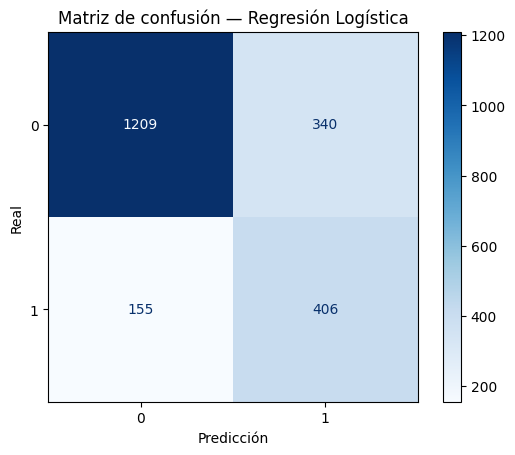


--- Random Forest ---
              precision    recall  f1-score   support

           0      0.861     0.821     0.841      1549
           1      0.562     0.635     0.596       561

    accuracy                          0.772      2110
   macro avg      0.712     0.728     0.719      2110
weighted avg      0.782     0.772     0.776      2110



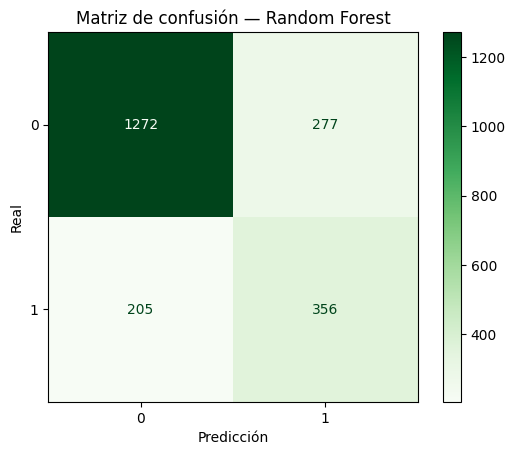


--- SVM ---
              precision    recall  f1-score   support

           0      0.885     0.768     0.822      1549
           1      0.531     0.724     0.612       561

    accuracy                          0.756      2110
   macro avg      0.708     0.746     0.717      2110
weighted avg      0.791     0.756     0.767      2110



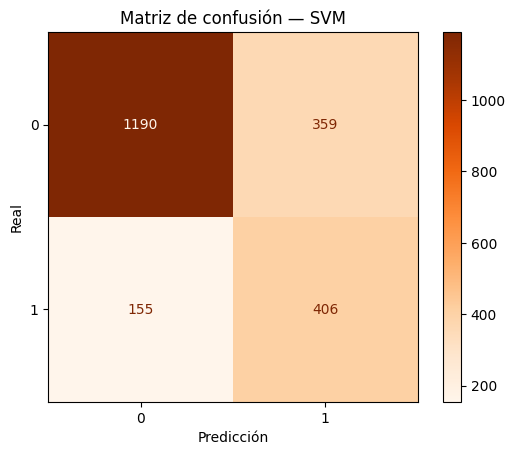


--- MLP (Red Neuronal) ---
              precision    recall  f1-score   support

           0      0.848     0.774     0.809      1549
           1      0.497     0.617     0.551       561

    accuracy                          0.732      2110
   macro avg      0.673     0.695     0.680      2110
weighted avg      0.755     0.732     0.741      2110



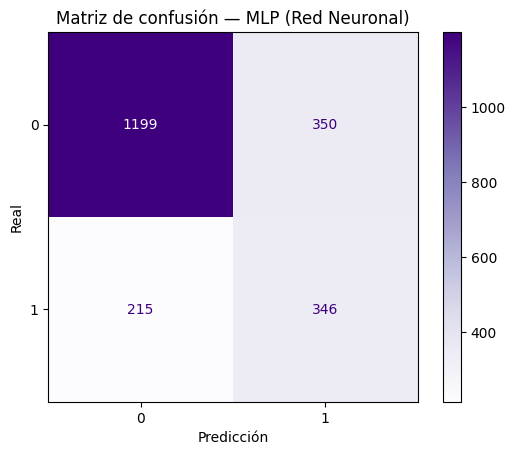

In [45]:
def evaluar_modelo(nombre, y_true, y_pred, cmap):
    print(f"\n--- {nombre} ---")
    print(classification_report(y_true, y_pred, digits=3))
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=cmap)
    plt.title(f"Matriz de confusión — {nombre}")
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.show()

evaluar_modelo("Regresión Logística", y_test, y_pred_lr,  cmap="Blues")
evaluar_modelo("Random Forest",       y_test, y_pred_rf,  cmap="Greens")
evaluar_modelo("SVM",                 y_test, y_pred_svm, cmap="Oranges")
evaluar_modelo("MLP (Red Neuronal)",  y_test, y_pred_mlp, cmap="Purples")


🩺 Overfitting / Underfitting (Train vs Test)

In [46]:
resumen = []

# Exactitud en TRAIN y TEST para cada modelo
resumen.append(("LogReg",
                accuracy_score(y_train_res, log_reg.predict(X_train_res_scaled)),
                accuracy_score(y_test,      y_pred_lr)))

resumen.append(("RandomForest",
                accuracy_score(y_train_res, rf.predict(X_train_res)),
                accuracy_score(y_test,      y_pred_rf)))

resumen.append(("SVM",
                accuracy_score(y_train_res, svm.predict(X_train_res_scaled)),
                accuracy_score(y_test,      y_pred_svm)))

resumen.append(("MLP",
                accuracy_score(y_train_res, mlp.predict(X_train_res_scaled)),
                accuracy_score(y_test,      y_pred_mlp)))

df_over = pd.DataFrame(resumen, columns=["Modelo", "Accuracy_Train", "Accuracy_Test"])
df_over["Gap"] = (df_over["Accuracy_Train"] - df_over["Accuracy_Test"]).round(4)
df_over.sort_values("Accuracy_Test", ascending=False, inplace=True)
df_over


,Modelo,Accuracy_Train,Accuracy_Test,Gap
1,RandomForest,0.999032,0.771564,0.2275
0,LogReg,0.805894,0.765403,0.0405
2,SVM,0.839375,0.756398,0.0830
3,MLP,0.926674,0.732227,0.1944


# 📊 Conclusión Final — Informe Ejecutivo de Cancelación (Churn)

## ✅ Principales factores de cancelación

1) **Contrato “Mes a Mes”**  
   Los clientes en contratos de corto plazo presentan mayor probabilidad de cancelar. Los contratos de **1 año** y especialmente **2 años** actúan como factor protector.

2) **Baja antigüedad (tenure)**  
   La probabilidad de churn es marcadamente superior en clientes **nuevos**. Aumenta la permanencia, disminuye el churn.

3) **Cargos mensuales altos (MonthlyCharges)**  
   A mayor gasto mensual, **mayor riesgo de cancelación**, especialmente si no se percibe valor agregado.

4) **Método de pago: Cheque Electrónico**  
   Se asocia a mayor churn frente a métodos automáticos. Indica fricción y menor “adhesión” al servicio.

5) **Mix de servicios contratado (muy pocos o demasiados)**  
   Con pocos servicios, el cliente **no percibe valor**; con demasiados, **percibe sobrecosto**. Ambos extremos elevan el riesgo.

---

## 🔎 Lo que nos dicen los modelos

- **Regresión Logística (interpretabilidad y equilibrio):**  
  Coeficientes **positivos** para *MonthlyCharges*; **negativos** para *Contract (Two year)* y *TotalCharges*. Muestra una relación clara: **precio mensual ↑ → churn ↑**; **compromiso/relación ↑ → churn ↓**.

- **Random Forest (rendimiento y no linealidad):**  
  Destaca como variables clave **tenure**, **MonthlyCharges** y **Contract**. Reafirma que **patrones de gasto y compromiso** explican la mayor parte del riesgo.

> En la comparación, **RF suele lograr mejor exactitud**, pero con riesgo de **overfitting** (gap train–test). **LR** ofrece **estabilidad** e **interpretación directa** de drivers, útil para acciones comerciales.

---

## 🎯 Recomendaciones de retención (accionables)

1) **Migración a contratos de mayor plazo**  
   Ofrecer **descuentos + beneficios** (ej. data extra, streaming, soporte premium) a clientes “Mes a Mes” para migrarlos a **12–24 meses**.

2) **Onboarding y cuidado de clientes nuevos (0–6 meses)**  
   Programa de **bienvenida** con seguimiento proactivo, tutoriales y **soporte prioritario** en los primeros 90 días.

3) **Percepción de valor para cargos mensuales altos**  
   Mantener precio, pero **aumentar valor** (bundles, beneficios VIP). Revisiones de plan trimestrales para asegurar **“plan correcto al precio correcto”**.

4) **Incentivo a pagos automáticos**  
   Bonificación por activar débito/TC. Reduce fricción y la cancelación asociada a **Cheque Electrónico**.

5) **Optimizar el mix de servicios**  
   - Pocos servicios: **empaquetar** con valor (seguridad, respaldo, soporte, entretenimiento).  
   - Demasiados servicios: **revisiones de cuenta** para evitar sobrecosto percibido y ajustar al uso real.

---

## 🛠️ Recomendación de modelo operativo

- **Modelo base:** Regresión Logística calibrada (umbral ajustado a objetivo de **recall** en churn).  
- **Monitoreo:** Comparar continuamente con **Random Forest** (mayor performance bruta) para campañas.  
- **Métrica objetivo:** F1/Recall de clase 1 (churn) y **costo de error** (falsos negativos).  
- **Próximos pasos:** Ajuste de umbral por curva **ROC/PR**, *feature selection* ligera (Monthly vs Total + tenure), y validación cruzada.

---

## 📌 Resumen ejecutivo

El churn está impulsado principalmente por **contratos de corto plazo**, **baja antigüedad** y **cargos mensuales altos**.  
Las acciones de mayor impacto son: **extender plazo contractual**, **cuidar a clientes nuevos** e **incrementar la percepción de valor** (bundles/beneficios), además de **automatizar pagos**.

Estas medidas, alineadas con los drivers identificados por los modelos, permitirán **reducir la evasión** y **mejorar la fidelización** de forma sostenida.
